# In Depth A/B Testing - Lab

## Introduction

In this lab, you'll explore a survey from Kaggle regarding budding data scientists. With this, you'll form some initial hypotheses, and test them using the tools you've acquired to date. 

## Objectives

You will be able to:
* Conduct t-tests and an ANOVA on a real-world dataset and interpret the results

## Load the Dataset and Perform a Brief Exploration

The data is stored in a file called **multipleChoiceResponses_cleaned.csv**. Feel free to check out the original dataset referenced at the bottom of this lab, although this cleaned version will undoubtedly be easier to work with. Additionally, meta-data regarding the questions is stored in a file name **schema.csv**. Load in the data itself as a Pandas DataFrame, and take a moment to briefly get acquainted with it.

> Note: If you can't get the file to load properly, try changing the encoding format as in `encoding='latin1'`

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('ggplot')

df = pd.read_csv('multipleChoiceResponses_cleaned.csv', encoding='latin1', 
                 dtype = {'AdjustedCompensation': np.float64})
meta = pd.read_csv('schema.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [41]:
# A look at the dataframe, we can see that NaN values will be a problem in many columns
# including the AdjustedCompensation column
df.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,exchangeRate,AdjustedCompensation
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,NaN,NaN
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,250000.0
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 3 columns):
Column      290 non-null object
Question    290 non-null object
Asked       290 non-null object
dtypes: object(3)
memory usage: 6.9+ KB


In [ ]:
import pprint

In [15]:
print('Number of Columns: ', len(meta))
pprint.pprint(list(meta.Column))

Number of Columns:  290
['GenderSelect',
 'GenderFreeForm',
 'Country',
 'Age',
 'EmploymentStatus',
 'StudentStatus',
 'LearningDataScience',
 'KaggleMotivationFreeForm',
 'CodeWriter',
 'CareerSwitcher',
 'CurrentJobTitleSelect',
 'CurrentJobTitleFreeForm',
 'TitleFit',
 'CurrentEmployerType',
 'MLToolNextYearSelect',
 'MLToolNextYearFreeForm',
 'MLMethodNextYearSelect',
 'MLMethodNextYearFreeForm',
 'LanguageRecommendationSelect',
 'LanguageRecommendationFreeForm',
 'PublicDatasetsSelect',
 'PublicDatasetsFreeForm',
 'PersonalProjectsChallengeFreeForm',
 'LearningPlatformSelect',
 'LearningPlatformCommunityFreeForm',
 'LearningPlatformFreeForm1',
 'LearningPlatformFreeForm2',
 'LearningPlatformFreeForm3',
 'LearningPlatformUsefulnessArxiv',
 'LearningPlatformUsefulnessBlogs',
 'LearningPlatformUsefulnessCollege',
 'LearningPlatformUsefulnessCompany',
 'LearningPlatformUsefulnessConferences',
 'LearningPlatformUsefulnessFriends',
 'LearningPlatformUsefulnessKaggle',
 'LearningPlatfor

In [25]:
print('Number of Columns in cleaned dataset:', len(df.columns))

Number of Columns in cleaned dataset: 230


We can see that there are different amounts of columns in the cleaned dataset vs the original. I can see that there is no AdjustedCompensation feature in the original dataset, but rather a 'CompensationAmount' feature and 'Compensation Currency' feature, which were likely combined into a single, easier to understand feature for the cleaned dataset.

In [48]:
pprint.pprint(meta.loc[meta.Column == 'FormalEducation'])

             Column                                           Question Asked
83  FormalEducation  Which level of formal education have you attai...   All


## Wages and Education

You've been asked to determine whether education is impactful to salary. Develop a hypothesis test to compare the salaries of those with Master's degrees to those with Bachelor's degrees. Are the two statistically different according to your results?

> Note: The relevant features are stored in the 'FormalEducation' and 'AdjustedCompensation' features.

You may import the functions stored in the `flatiron_stats.py` file to help perform your hypothesis tests. It contains the stats functions that you previously coded: `welch_t(a,b)`, `welch_df(a, b)`, and `p_value(a, b, two_sided=False)`. 

Note that `scipy.stats.ttest_ind(a, b, equal_var=False)` performs a two-sided Welch's t-test and that p-values derived from two-sided tests are two times the p-values derived from one-sided tests. See the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) for more information.    

In [16]:
df.FormalEducation.value_counts()

Master's degree                                                      8204
Bachelor's degree                                                    4811
Doctoral degree                                                      3543
Some college/university study without earning a bachelor's degree     786
Professional degree                                                   451
I did not complete any formal education past high school              257
I prefer not to answer                                                 90
Name: FormalEducation, dtype: int64

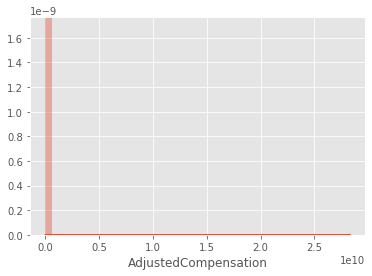

In [111]:
# Visualizing Adjusted Compensation feature:
sns.distplot(df[np.isfinite(df.AdjustedCompensation)].AdjustedCompensation)

In [27]:
# A look at the statistics for the feature
df.AdjustedCompensation.describe()

count    4.343000e+03
mean     6.636071e+06
std      4.293996e+08
min     -7.351631e+01
25%      2.036942e+04
50%      5.381217e+04
75%      9.566608e+04
max      2.829740e+10
Name: AdjustedCompensation, dtype: float64

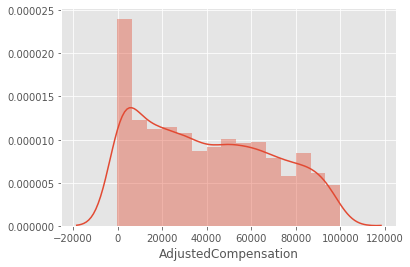

In [108]:
# Adjusting range for better visualization of income distribution without the last quantile
sns.distplot(df.AdjustedCompensation.loc[df.AdjustedCompensation < 10e+4])

In [35]:
from scipy.stats import skew, kurtosis 

In [33]:
skew(df.AdjustedCompensation.loc[df.AdjustedCompensation < 10e+4])

0.28286144505864796

In [18]:
from flatiron_stats import *

In [58]:
# Setting up the groups, filtering out rows with NaNs for AdjustedCompensation:
bachelors = df[np.isfinite(df.AdjustedCompensation)].loc[df.FormalEducation == "Bachelor's degree"]
masters = df[np.isfinite(df.AdjustedCompensation)].loc[df.FormalEducation == "Master's degree"]

Text(0.5, 1.0, "Master's Degree Holders")

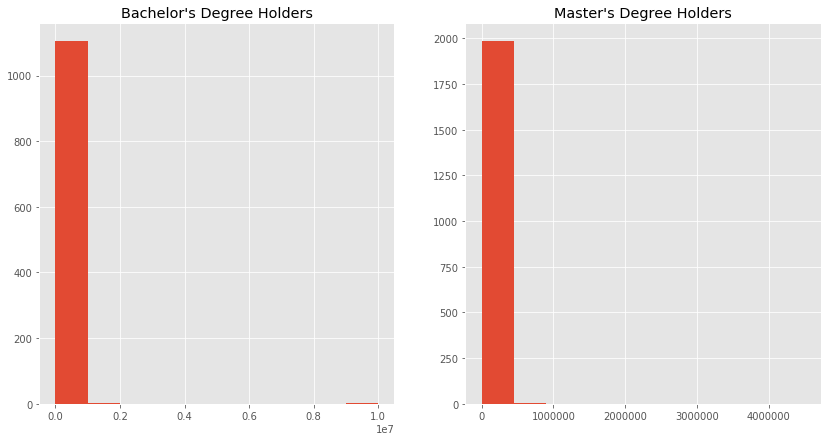

In [113]:
fig = plt.figure(figsize = (14,7))

ax1 = fig.add_subplot(121)
ax1 = bachelors.AdjustedCompensation.hist()
ax1.set_title("Bachelor's Degree Holders")

ax2 = fig.add_subplot(122)
ax2 = masters.AdjustedCompensation.hist()
ax2.set_title("Master's Degree Holders")

In [107]:
# Performing a two-sample welch's t-test without removing outliers:
print("Mean Values:")
print("Bachelors:", bachelors.AdjustedCompensation.mean())
print("Masters:", masters.AdjustedCompensation.mean())

print("\nP-value for null hypothesis that means are the same:")
print(p_value_welch_ttest(bachelors.AdjustedCompensation, masters.AdjustedCompensation))

Mean Values:
Bachelors: 64887.09799461879
Masters: 69139.89987120005

P-value for null hypothesis that means are the same:
0.33077639451272267


In [ ]:
# The groups do not appear to be statistically different with the outliers left in
# Trying the test again with outliers removed

# First to remove the outliers...

In [65]:
import seaborn as sns

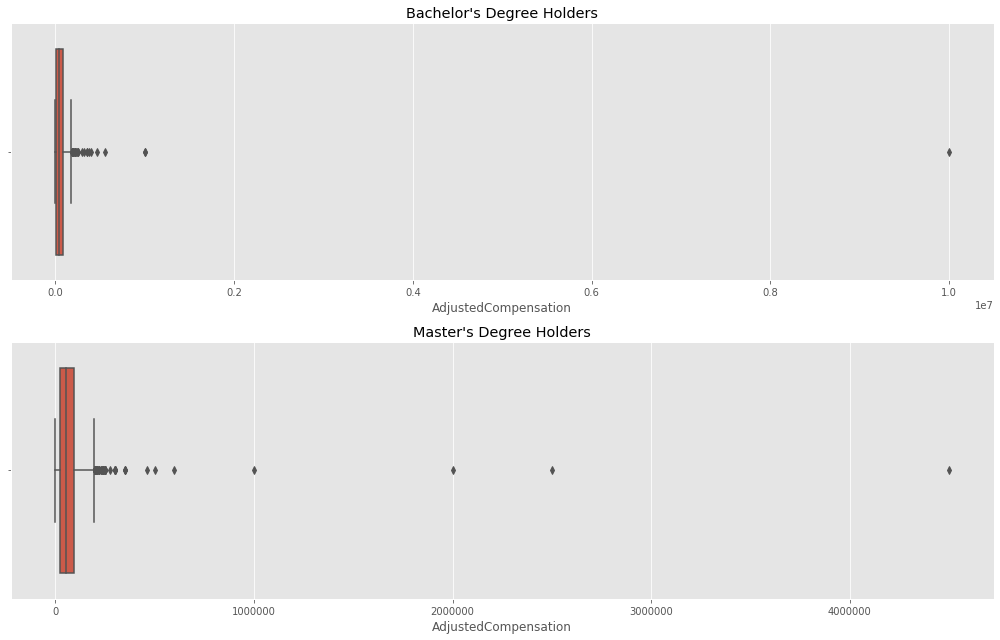

In [71]:
# Using seaborn boxplots to visualize the distributions and their outliers:
fig = plt.figure(figsize = (14,9))

ax1 = fig.add_subplot(211)
ax1 = sns.boxplot(x=bachelors.AdjustedCompensation)
ax1.set_title("Bachelor's Degree Holders")

ax2 = fig.add_subplot(212)
ax2 = sns.boxplot(x=masters.AdjustedCompensation)
ax2.set_title("Master's Degree Holders")

fig.tight_layout()

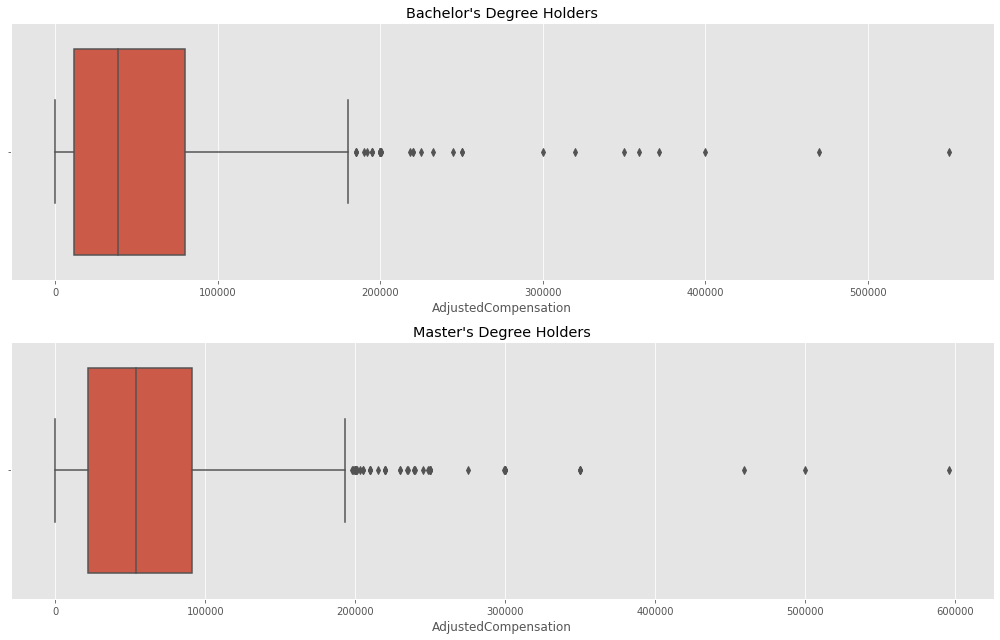

In [77]:
# I don't want to take all of the higher values out, lets try some conservative cuts at 700000,
# which seems like a good cut for both, and really only cuts out extremely high earners
bachelors2 = bachelors.loc[bachelors.AdjustedCompensation < 700000]
masters2 = masters.loc[masters.AdjustedCompensation < 700000]

fig = plt.figure(figsize = (14,9))

ax1 = fig.add_subplot(211)
ax1 = sns.boxplot(x=bachelors2.AdjustedCompensation)
ax1.set_title("Bachelor's Degree Holders")

ax2 = fig.add_subplot(212)
ax2 = sns.boxplot(x=masters2.AdjustedCompensation)
ax2.set_title("Master's Degree Holders")

fig.tight_layout()

In [93]:
# We can see that removing these outliers has drastically reduced the p-value to statistical
# significance
print("Mean Values:")
print("Bachelors:", bachelors2.AdjustedCompensation.mean())
print("Masters:", masters2.AdjustedCompensation.mean())

print("\nP-value for null hypothesis that means are the same:")
print(p_value_welch_ttest(bachelors2.AdjustedCompensation, masters2.AdjustedCompensation))

Mean Values:
Bachelors: 54193.85731887952
Masters: 64244.46160306552

P-value for null hypothesis that means are the same:
1.407911675466167e-06


In [79]:
# How many outliers were removed?
print("Outliers removed from Bachelor's group:", len(bachelors)-len(bachelors2))
print("Outliers removed from Master's group:", len(masters)-len(masters2))

Outliers removed from Bachelor's group: 3
Outliers removed from Master's group: 4


In [ ]:
# We can see that removing just a few extreme outliers from each group has drastically affected
# the results of our statistical test. People holding Master's degrees will be pleased to know 
# that apart from a few exceptionally high earners, they are part of a group which earns a 
# statistically higher average sum than their Bachelor's degree holding counterparts.



## Wages and Education II

Now perform a similar statistical test comparing the AdjustedCompensation of those with Bachelor's degrees and those with Doctorates. If you haven't already, be sure to explore the distribution of the AdjustedCompensation feature for any anomalies. 

Number of Doctors before removing outliers: 967


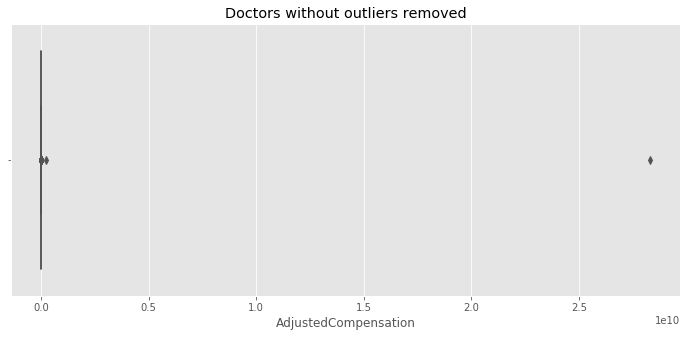

In [106]:
doctors = df[np.isfinite(df.AdjustedCompensation)].loc[df.FormalEducation == 'Doctoral degree']
print("Number of Doctors before removing outliers:", len(doctors))
fig = plt.figure(figsize=(12,5))
sns.boxplot(x=doctors.AdjustedCompensation)
plt.title("Doctors without outliers removed")
plt.show()

In [100]:
# Performing two-sample welch's t-test on Bachelors and Doctors:
print("Mean Values:")
print("   Bachelors:", bachelors.AdjustedCompensation.mean())
print("   Doctors:", doctors.AdjustedCompensation.mean())
print("Sample Sizes with outliers:")
print("   Bachelors:", len(bachelors))
print("   Doctors:", len(doctors))
print("\nP-value for null hypothesis that means are the same:")
print(p_value_welch_ttest(bachelors.AdjustedCompensation, doctors.AdjustedCompensation))

Mean Values:
   Bachelors: 64887.09799461879
   Doctors: 29566175.76245311
Sample Sizes with outliers:
   Bachelors: 1107
   Doctors: 967

P-value for null hypothesis that means are the same:
0.1568238199472023


In [101]:
# Above we can see that despite the large difference between the means of the two groups, the 
# t-test still concludes that there is a ~16% probability that the two samples come from the 
# same underlying population. This is likely due to the large effects on variance/standard deviation 
# that these outliers cause. The much larger standard deviations suggest that the mean difference 
# would not be as extreme as it really is.

In [102]:
print("Standard Devations with Outliers:")
print("   Bachelors:", bachelors.AdjustedCompensation.std(ddof=1))
print("   Doctors:", doctors.AdjustedCompensation.std(ddof=1))

Standard Devations with Outliers:
   Bachelors: 306935.87238797836
   Doctors: 909998082.3346782


Number of Doctors after removing outliers: 964


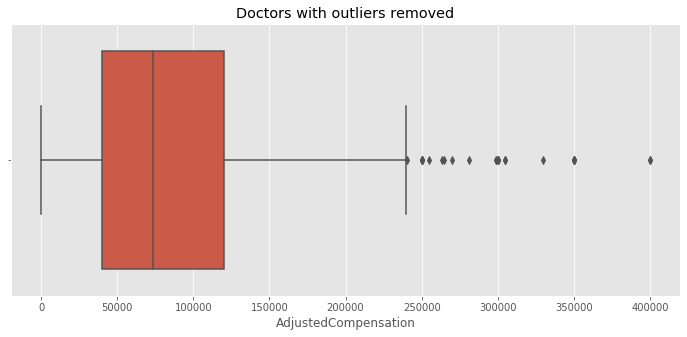

In [105]:
doctors2 = doctors.loc[doctors.AdjustedCompensation < 1000000]

print("Number of Doctors after removing outliers:", len(doctors2))

fig = plt.figure(figsize=(12,5))
sns.boxplot(x=doctors2.AdjustedCompensation)
plt.title("Doctors with outliers removed")
plt.show()

In [99]:
# Performing two-sample welch's t-test on Bachelors and Doctors:
print("Mean Values:")
print("   Bachelors:", bachelors2.AdjustedCompensation.mean())
print("   Doctors:", doctors2.AdjustedCompensation.mean())
print("Sample Sizes without outliers:")
print("   Bachelors:", len(bachelors2))
print("   Doctors:", len(doctors2))
print("\nP-value for null hypothesis that means are the same:")
print(p_value_welch_ttest(bachelors2.AdjustedCompensation, doctors2.AdjustedCompensation))

Mean Values:
   Bachelors: 54193.85731887952
   Doctors: 86194.98163085166
Sample Sizes without outliers:
   Bachelors: 1104
   Doctors: 964

P-value for null hypothesis that means are the same:
0.0


In [103]:
# We can see above that after removing outliers from both groups, the probability of the null 
# hypothesis of bachelors and doctors making the same amount on average being true is zero.
# This is despite a much smaller difference in means after removing outliers, due to a significant
# decrease in standard deviation for the samples

In [104]:
print("Standard Devations without Outliers:")
print("   Bachelors:", bachelors2.AdjustedCompensation.std(ddof=1))
print("   Doctors:", doctors2.AdjustedCompensation.std(ddof=1))

Standard Devations without Outliers:
   Bachelors: 57243.197771301246
   Doctors: 65298.89327263121


## Wages and Education III

Remember the multiple comparisons problem; rather than continuing on like this, perform an ANOVA test between the various 'FormalEducation' categories and their relation to 'AdjustedCompensation'.

In [95]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [98]:
# Run ANOVA test with outliers left in:
formula = 'AdjustedCompensation ~ C(FormalEducation)'
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                          sum_sq      df         F    PR(>F)
C(FormalEducation)  6.540294e+17     6.0  0.590714  0.738044
Residual            7.999414e+20  4335.0       NaN       NaN


In [ ]:
# We can see in the cell above that without removing outliers, the ANOVA test shows us a high 
# probability that the different education groups come from the same underlying population.

In [97]:
# Run ANOVA test with outliers removed:
formula = 'AdjustedCompensation ~ C(FormalEducation)'
df_trim = df.loc[df.AdjustedCompensation < 700000]
lm = ols(formula, df_trim).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                          sum_sq      df        F        PR(>F)
C(FormalEducation)  5.604207e+11     6.0  26.3367  5.934110e-31
Residual            1.533158e+13  4323.0      NaN           NaN


In [ ]:
# We can see in the cell above that the ANOVA test, once outliers are removed, agrees with the 
# previous tests in that it finds differences in variance between the different FormalEducation 
# groups to indicate that they are not part of the same populations of earners.

## Additional Resources

Here's the original source where the data was taken from:  
    [Kaggle Machine Learning & Data Science Survey 2017](https://www.kaggle.com/kaggle/kaggle-survey-2017)

## Summary

In this lab, you practiced conducting actual hypothesis tests on actual data. From this, you saw how dependent results can be on the initial problem formulation, including preprocessing!